<a href="https://colab.research.google.com/github/nadiataoufik/Census_income-/blob/master/Project_Traffic_Sign_Detection_Using_Dense_Net_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step1:IMPORT LIBRARIES AND DATASET 


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import pickle 
import random 
import seaborn as sns

In [ ]:
# load the dataset 
with open('/content/drive/MyDrive/train.p', mode='rb') as training_data:
  train=pickle.load(training_data)
with open('/content/drive/MyDrive/test.p',mode='rb') as testing_data:
  test=pickle.load(testing_data)
with open('/content/drive/MyDrive/valid.p', mode='rb') as validation_data:
  valid=pickle.load(validation_data)

In [ ]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [ ]:
train['labels'][1]

41

In [ ]:
train['features'].shape

(34799, 32, 32, 3)

In [ ]:
train['labels'].shape

(34799,)

In [ ]:
X_train,y_train=train['features'],train['labels']
X_test,y_test=test['features'],test['labels']
X_val,y_val=valid['features'],valid['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

In [ ]:
X_val.shape

(4410, 32, 32, 3)

# STEP 2:IMAGE EXPLORATION

1

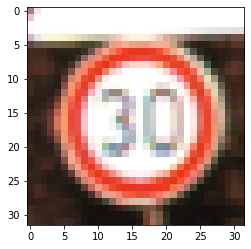

In [ ]:
i=3000
plt.imshow(X_train[i])
y_train[i]

11

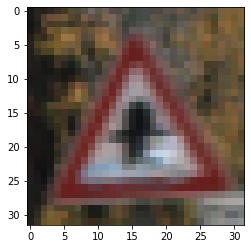

In [ ]:
i=3000
plt.imshow(X_test[i])
y_test[i]

38

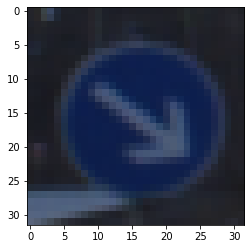

In [ ]:
i=2000
plt.imshow(X_val[i])
y_val[i]

# STEP 3: DATA PREPARATION

In [ ]:
# shuffle the dataset 
from sklearn.utils import shuffle 
X_train,y_train=shuffle(X_train,y_train)

In [ ]:
#convert the image to gray scale 
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_val_gray=np.sum(X_val/3,axis=3,keepdims=True)

In [ ]:
#normalize the dataset 
X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_val_gray_norm=(X_val_gray-128)/128

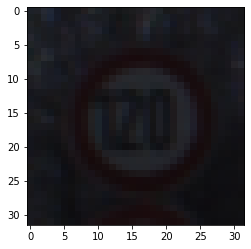

In [ ]:
#visualize the data 
i=6000
plt.imshow(X_train[i])

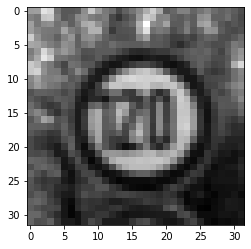

In [ ]:
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')

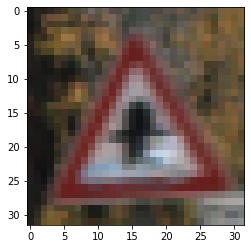

In [ ]:
i=3000
plt.imshow(X_test[i])

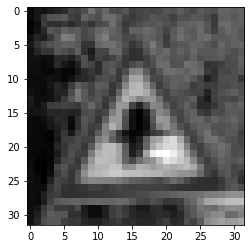

In [ ]:
plt.imshow(X_test_gray[i].squeeze(),cmap='gray')

# STEP 4: MODEL TRAINING

In [ ]:
# import relevant libraries 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout,GlobalMaxPooling2D, Concatenate

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


In [ ]:
INPUT_SHAPE= X_train[i].shape
INPUT_SHAPE

(32, 32, 3)

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet169, DenseNet201, DenseNet121
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import losses, optimizers, activations, metrics

In [ ]:
cnn_model1= Sequential()
cnn_model1.add(DenseNet121(input_shape=INPUT_SHAPE, include_top=False))
cnn_model1.add(GlobalAveragePooling2D())
cnn_model1.add(BatchNormalization())
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Dense(units=120, activation='relu'))
cnn_model1.add(Dense(units=84, activation='relu'))
cnn_model1.add(BatchNormalization())
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Dense(units=43, activation = 'softmax'))
cnn_model1.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               123000    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
_________________________________________________________________
batch_normalization_1 (Batch (None, 84)                3

In [ ]:
history = cnn_model1.fit(X_train,
                        y_train,
                        batch_size=500,validation_data=(X_val, y_val),
                        epochs=100,
                        verbose=1)

Epoch 1/100
70/70 [==============================] - 7s 106ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.2504 - val_accuracy: 0.9549
Epoch 2/100
70/70 [==============================] - 7s 105ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.2025 - val_accuracy: 0.9642
Epoch 3/100
70/70 [==============================] - 7s 105ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.2463 - val_accuracy: 0.9571
Epoch 4/100
70/70 [==============================] - 7s 105ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.2847 - val_accuracy: 0.9476
Epoch 5/100
70/70 [==============================] - 7s 105ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.2526 - val_accuracy: 0.9469
Epoch 6/100
70/70 [==============================] - 7s 105ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.2422 - val_accuracy: 0.9558
Epoch 7/100
70/70 [==============================] - 7s 105ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.3579 - val_accuracy: 0.9410

# STEP 5: MODEL EVALUATION

In [ ]:
score = cnn_model1.evaluate(X_test, y_test,verbose=0)
print('Test Accuracy :' ,round(score[1],3))

Test Accuracy : 0.974


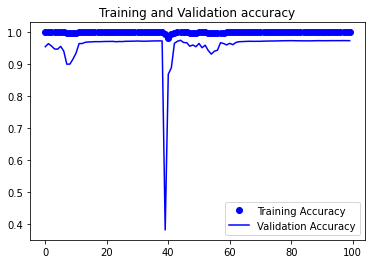

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


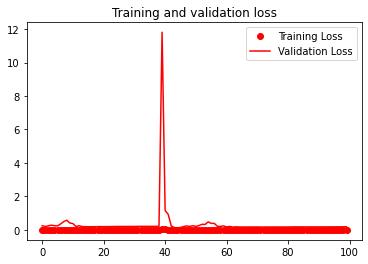

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#get the predictions for the test data
predicted_classes = cnn_model1.predict_classes(X_test)
#get the indices to be plotted
y_true = y_test


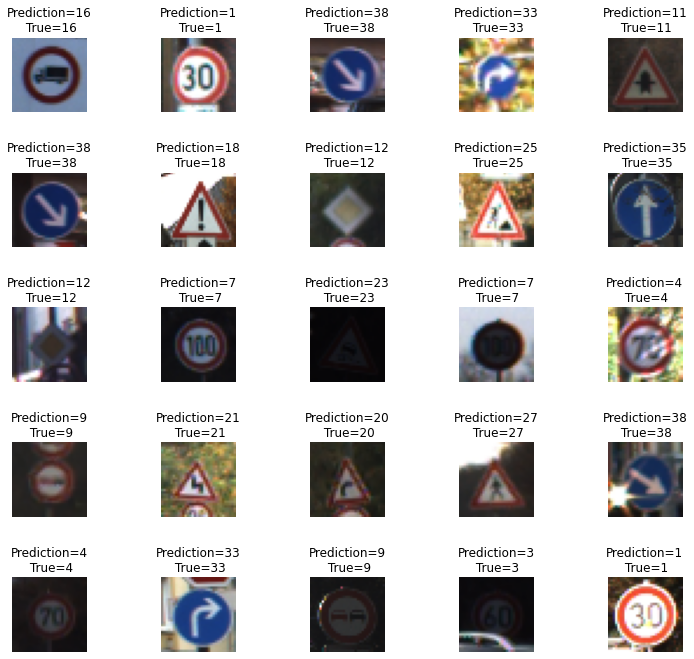

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,predicted_classes)

0.9741092636579572